# 601 PROJECT 1

### Dataset Source : https://catalog.data.gov/dataset/vaccines-gov-covid-19-vaccinating-provider-locations/resource/ab31aaf6-8a9f-4dd8-ab49-6813327afb94

### This Anlaysis include following Hypothesis: 
1. How many vaccines instock accepts insurance?,
2. Which state has low no. of insurance acceptance(states) for vaccine?, 
3. what is vaccine quantity last updated month?,Vaccine availability by month, 
4. Vaccine level occurences,
5. Vaccine availability by month 
6. plotting vaccine provider locations using latitude and longitude
7. corelation between columns

In [13]:
pip install opendatasets --upgrade   #Python library for downloading datasets

Note: you may need to restart the kernel to use updated packages.


### Downloading Dataset

In [14]:
import opendatasets as od                                #importing opendatasets
                                                         #downloading dataset from the URL
download_url = 'https://data.cdc.gov/api/views/5jp2-pgaw/rows.csv?accessType=DOWNLOAD'
    
file=od.download(download_url)                                              #storing downloaded dataset to file

Using downloaded and verified file: .\Vaccines.gov__COVID-19_vaccinating_provider_locations.csv


In [15]:
import pandas as pd                                   #importing pandas
df=pd.read_csv(r'Vaccines.gov__COVID-19_vaccinating_provider_locations.csv')  #reading downloaded dataset using dataframes as df
df.head()           #displays top5 values from dataset

,provider_location_guid,loc_store_no,loc_phone,loc_name,loc_admin_street1,loc_admin_street2,loc_admin_city,loc_admin_state,loc_admin_zip,sunday_hours,...,provider_notes,ndc,med_name,in_stock,supply_level,quantity_last_updated,latitude,longitude,Category,Unnamed Column
0,5b052b7f-4a8c-4ed2-90f8-40fecd2946fe,Not applicable,(334) 566-0100,BYRD DRUG CO. INC,81 N COURT SQ,NaN,TROY,AL,36081,Closed,...,By appointment only,80777-0273-10,"Moderna, COVID-19 Vaccine, 100mcg/0.5mL 10 dose",True,4,2021-05-13,31.808115,-85.971525,covid,NaN
1,94a3fdfd-4c50-4299-a1e5-919773574eab,Not applicable,(833) 754-2149,ACCESS WESTSIDE FAMILY HEALTH CENTER,3752 W 16TH ST,NaN,CHICAGO,IL,60623-2028,Closed,...,NaN,59676-0580-05,"Janssen, COVID-19 Vaccine, 0.5 mL",False,0,2021-08-19,41.859127,-87.719686,covid,NaN
2,bfdb7bb9-ce54-47c4-8be4-c2fb16a4942a,Not applicable,318-335-0973,"Lake Are Home Health Agency, Inc. [[HOME HEALT...",114 North 11th Street,NaN,Oakdale,LA,71463,NaN,...,NaN,80777-0273-10,"Moderna, COVID-19 Vaccine, 100mcg/0.5mL 10 dose",True,-1,2021-07-08,30.816047,-92.660661,covid,NaN
3,9fc4cb89-af3d-4f5d-8305-6a90a6355eb4,Not applicable,(540) 465-5001,Strasburg Pharmacy,"33820 old Valley Pike,",Unit 7,STRASBURG,VA,22657,Closed,...,NaN,59267-1000-01,"Pfizer-BioNTech, COVID-19 Vaccine, 30 mcg/0.3mL",False,0,2021-05-11,39.004413,-78.339107,covid,NaN
4,8a85b26f-6fde-4c8c-8f33-2ef3bf266950,36102,614-410-2814,The Little Clinic #36102,199 Graceland Blvd.,NaN,Columbus,OH,43214-1529,NaN,...,NaN,80777-0273-10,"Moderna, COVID-19 Vaccine, 100mcg/0.5mL 10 doses",False,0,2021-07-24,40.065076,-83.025550,covid,NaN


## DATA CLEANING

In [16]:
Nullcheck = df.isnull().sum()    #checking how many null values are present in dataset by column
Nullcheck

provider_location_guid         0
loc_store_no                   0
loc_phone                   1421
loc_name                       0
loc_admin_street1             13
loc_admin_street2         146691
loc_admin_city                 0
loc_admin_state                0
loc_admin_zip                  0
sunday_hours               48004
monday_hours               25411
tuesday_hours              25030
wednesday_hours            24912
thursday_hours             24982
friday_hours               25645
saturday_hours             37407
web_address                27843
pre_screen                 40758
insurance_accepted         32590
walkins_accepted           25399
provider_notes            124304
ndc                            0
med_name                       0
in_stock                       0
supply_level                   0
quantity_last_updated          0
latitude                      34
longitude                     34
Category                       0
Unnamed Column            196930
dtype: int

In [17]:
#Filling the missing values in dataset with 0.               #filling out missing values in columns
df.fillna({'loc_phone':'0', 'Unnamed Column':'0'},inplace=True)

In [18]:
df1=df.drop_duplicates(keep='first')   #removing duplicates from the dataset

In [19]:
print(df.shape) #After checking for duplicates           #printing the shape of datasets which gives number of columns and rows
print(df1.shape) #Before checking for duplicates     
#so here columns and rows were same before and after. So there are no duplicate values

(196930, 30)
(196930, 30)


In [20]:
print(df1.isnull().sum())    

provider_location_guid         0
loc_store_no                   0
loc_phone                      0
loc_name                       0
loc_admin_street1             13
loc_admin_street2         146691
loc_admin_city                 0
loc_admin_state                0
loc_admin_zip                  0
sunday_hours               48004
monday_hours               25411
tuesday_hours              25030
wednesday_hours            24912
thursday_hours             24982
friday_hours               25645
saturday_hours             37407
web_address                27843
pre_screen                 40758
insurance_accepted         32590
walkins_accepted           25399
provider_notes            124304
ndc                            0
med_name                       0
in_stock                       0
supply_level                   0
quantity_last_updated          0
latitude                      34
longitude                     34
Category                       0
Unnamed Column                 0
dtype: int

In [21]:
#dropping unwanted columns
drop_cols=['Unnamed Column','provider_notes','loc_admin_street2','web_address','pre_screen']
df=df.drop(drop_cols,axis=1)

In [22]:
print(df.isnull().sum())

provider_location_guid        0
loc_store_no                  0
loc_phone                     0
loc_name                      0
loc_admin_street1            13
loc_admin_city                0
loc_admin_state               0
loc_admin_zip                 0
sunday_hours              48004
monday_hours              25411
tuesday_hours             25030
wednesday_hours           24912
thursday_hours            24982
friday_hours              25645
saturday_hours            37407
insurance_accepted        32590
walkins_accepted          25399
ndc                           0
med_name                      0
in_stock                      0
supply_level                  0
quantity_last_updated         0
latitude                     34
longitude                    34
Category                      0
dtype: int64


In [27]:
df.dropna(axis=0,inplace=True)    #dropping values which have null values

In [28]:
print(df.isnull().sum())     #checking for any null values

provider_location_guid    0
loc_store_no              0
loc_phone                 0
loc_name                  0
loc_admin_street1         0
loc_admin_city            0
loc_admin_state           0
loc_admin_zip             0
sunday_hours              0
monday_hours              0
tuesday_hours             0
wednesday_hours           0
thursday_hours            0
friday_hours              0
saturday_hours            0
insurance_accepted        0
walkins_accepted          0
ndc                       0
med_name                  0
in_stock                  0
supply_level              0
quantity_last_updated     0
latitude                  0
longitude                 0
Category                  0
dtype: int64


In [25]:
df1=df.drop_duplicates(keep='first')   #dropping duplicates again to make sure they are none

In [26]:
print(df.shape) #After checking for duplicates
print(df1.shape) #Before checking for duplicates

(144024, 25)
(144024, 25)


### Exploratory Data Analysis

,in_stock,supply_level,latitude,longitude
in_stock,1.000000,0.350843,0.025726,-0.023148
supply_level,0.350843,1.000000,-0.069507,0.007169
latitude,0.025726,-0.069507,1.000000,-0.011652
longitude,-0.023148,0.007169,-0.011652,1.000000


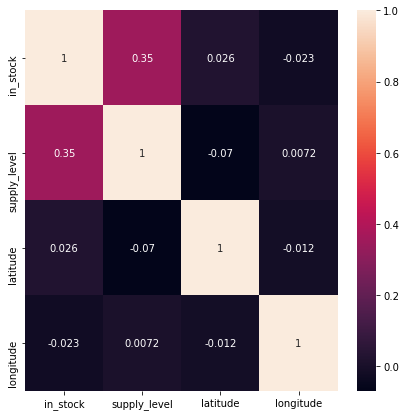

In [9]:
#this indicates supply level and vaccines that are in stock by longitude and latitude.
import matplotlib.pyplot as plt  
import seaborn as sns   
plt.figure(figsize=(7,7))
cor= df.corr(method='pearson', min_periods=2)
sns.heatmap(cor,annot=True)
sns.color_palette("bright")
cor
#here we are getting corelation between columns, negative value indicates they are inversly proportional and positive value
#indicates they are proportional
#strongest corelation here is supplylevel and instock.

<AxesSubplot:xlabel='in_stock', ylabel='insurance_accepted'>

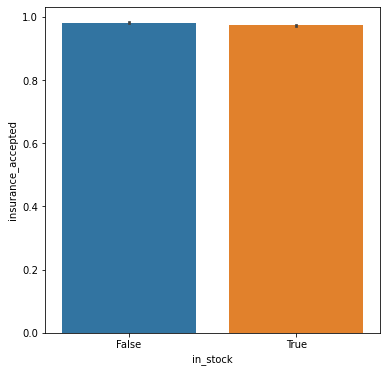

In [10]:
#Question: How many vaccines instock accepts insurance
#Answer: Around 95% of vaccines that are instock accepts insurance.
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (6,6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y="insurance_accepted", x="in_stock",data=df)

#reference: https://seaborn.pydata.org/

<AxesSubplot:xlabel='loc_admin_state', ylabel='insurance_accepted'>

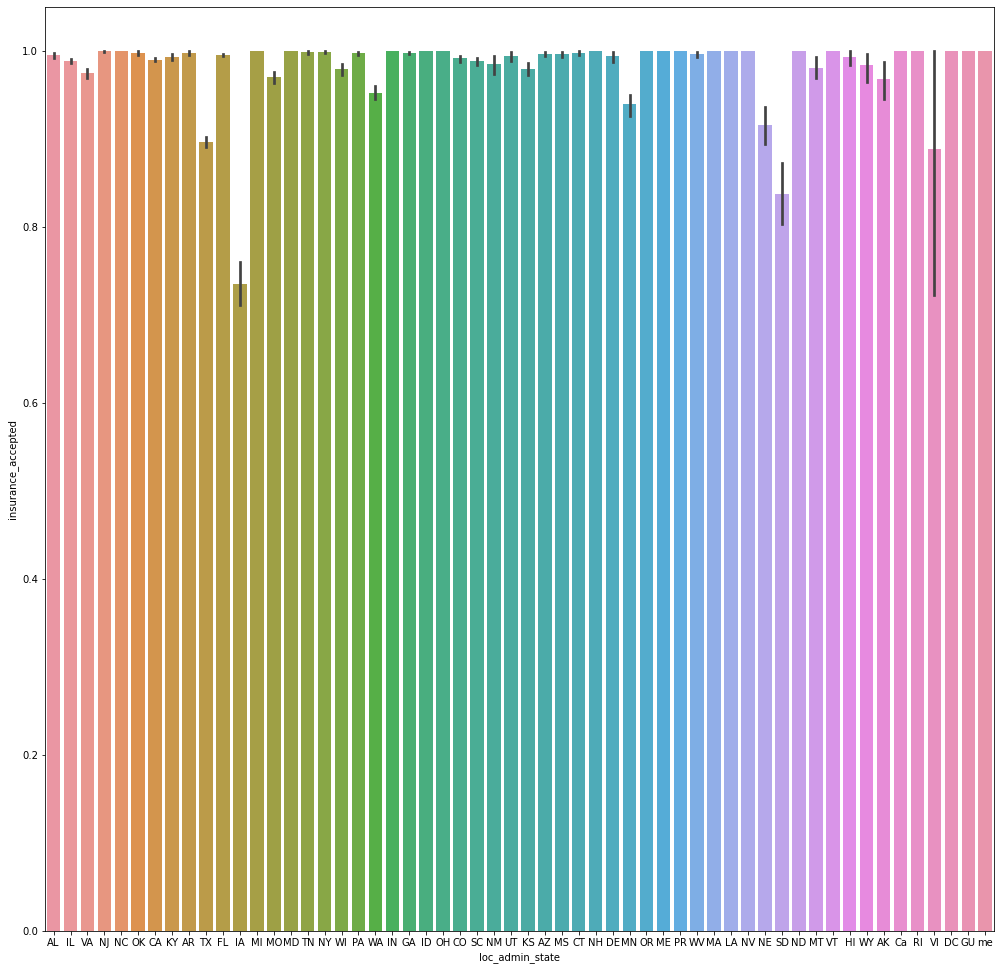

In [49]:
#Question: Which state has low no. of insurance acceptance(states) for vaccine
#lowa has low insurance acceptance places    
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (17,17)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y="insurance_accepted", x="loc_admin_state",data=df)
#black line here represents standard deviation.


#Extracting the date from timestamp and plotting vaccine quantity by last updated month

In [36]:
dates = pd.to_datetime(df['quantity_last_updated'], format='%Y/%m/%d')  #extracting dates from timestamp
dates

0        2021-05-13
1        2021-08-19
3        2021-05-11
7        2021-07-09
10       2021-08-13
            ...    
196925   2021-10-11
196926   2021-10-11
196927   2021-10-10
196928   2021-10-11
196929   2021-10-10
Name: quantity_last_updated, Length: 144024, dtype: datetime64[ns]

In [37]:
dates.dt.month   #extracting month from date

0          5
1          8
3          5
7          7
10         8
          ..
196925    10
196926    10
196927    10
196928    10
196929    10
Name: quantity_last_updated, Length: 144024, dtype: int64

<AxesSubplot:xlabel='quantity_last_updated', ylabel='Count'>

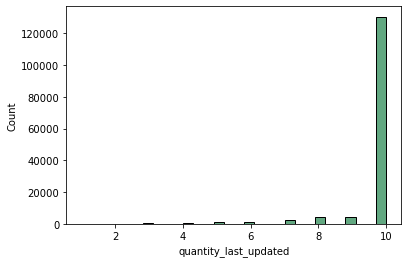

In [38]:
#this represents vaccine quantity last updated month
#Question: In which month of the year, vaccine quantity is updated.
sns.histplot(dates.dt.month,bins=30,color = "seagreen")
#Answer: Mostly vaccine updation accoured in month of october.

Text(0.5, 1.0, 'Vaccine name and month')

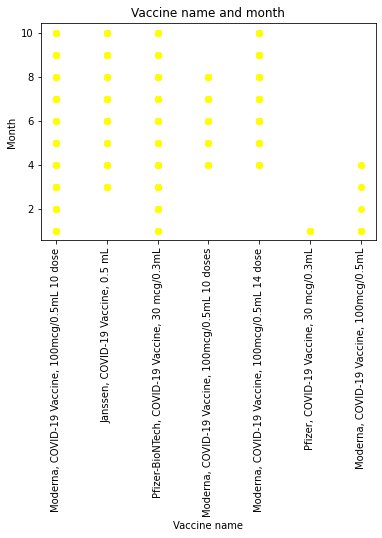

In [40]:
#Question : Vaccine availability by month

plt.scatter(df['med_name'], dates.dt.month, c='yellow')
plt.tick_params(axis='x', labelrotation = 90)
plt.xlabel('Vaccine name')
plt.ylabel('Month')
plt.title('Vaccine name and month')

#Answer : Vaccine availability for moderna 10doses is available throughout the year.

Text(0.5, 1.0, 'Histogram for Vaccine supply level')

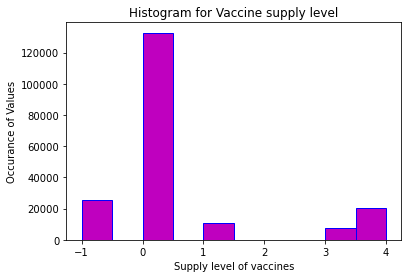

In [26]:
#Vaccine level occurences
plt.hist(df['supply_level'], facecolor='m',edgecolor='blue')
plt.xlabel('Supply level of vaccines')
plt.ylabel('Occurance of Values')
plt.title('Histogram for Vaccine supply level')
#4 level means here vaccines availability is more
#3 level indicates vaccines availability is little less
#2 level imdicates vaccines availability is less
#1 level indicates vaccines availability is very less
#0 level indicates vaccines availability is zero
#-1 indicates that there is requirement but no vaccines

#4th level means here vaccines availability is more
#3rd level indicates vaccines availability is little less
#2nd level imdicates vaccines availability is less
#1st level indicates vaccines availability is very less
#0th level indicates vaccines availability is zero
#-1  level indicates that there is requirement but no vaccines

Text(0.5, 1.0, 'Month and supply level')

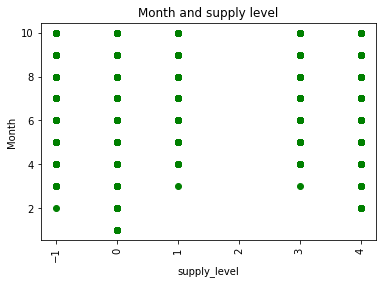

In [41]:
#Question : Supply level by month

plt.scatter(df['supply_level'], dates.dt.month, c='green')
plt.tick_params(axis='x', labelrotation = 90)
plt.xlabel('supply_level')
plt.ylabel('Month')
plt.title('Month and supply level')

#Answer:
# 4- sufficient 

In [28]:
df.latitude       #getting latitude values from dataset

0         31.808115
1         41.859127
2         30.816047
3         39.004413
4         40.065076
            ...    
196925    30.271687
196926    31.229340
196927    40.512499
196928    44.488882
196929    33.935574
Name: latitude, Length: 196930, dtype: float64

In [29]:
df.longitude   #getting longitude values from dataset

0         -85.971525
1         -87.719686
2         -92.660661
3         -78.339107
4         -83.025550
             ...    
196925    -97.697761
196926    -85.435059
196927    -88.946590
196928    -88.064804
196929   -117.387123
Name: longitude, Length: 196930, dtype: float64

#plotting vaccine provider locations by latitude and longitude

In [30]:
sample_df = df.sample(int(0.1 * len(df)))         

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

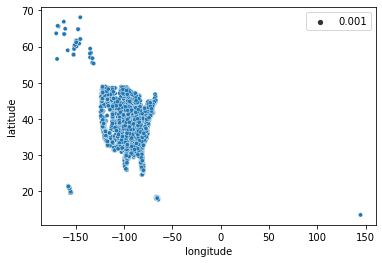

In [31]:
sns.scatterplot(x=sample_df.longitude, y=sample_df.latitude, size=0.001)      
#plotting locations using latitude and longitude

#as the above plotting is not that clearly understandable. used heat map to plot the same

In [29]:
import folium                    #importing folium, built primarily to help people visualize geospatial data
lat,lon= df.latitude[0], df.longitude[0]
lat,lon

(31.808115, -85.971525)

In [30]:
for x in df[['latitude', 'longitude']].sample(100).iteritems(): #iterating through all the longitude and latitude values to plot
    print(x[1])

11564     32.321418
28507     35.573245
169634    38.880867
183815    38.759118
144970    44.994627
            ...    
140967    40.101671
60056     35.686657
181652    39.989245
180278    44.259801
153405    34.877089
Name: latitude, Length: 100, dtype: float64
11564     -96.215392
28507     -88.815720
169634    -94.758481
183815    -76.807310
144970   -124.004907
             ...    
140967    -85.710328
60056     -88.858251
181652    -83.005419
180278    -88.273308
153405    -84.325754
Name: longitude, Length: 100, dtype: float64


In [31]:
zip(list(df.latitude), list(df.longitude))   #zipping creates pairs

In [32]:
from folium.plugins import HeatMap   #importing heat map from folium

In [33]:
sample_df = df.sample(int(0.001 * len(df)))          #taking one percent of data here from dataset
lat_lon_pairs = list(zip(list(sample_df.latitude), list(sample_df.longitude)))  
#creating pairs of longitude and longitude and adding them to map

In [34]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)          #adding longitude and latitude values to map to create heat map.
map
